# ¡Bienvenides al Club de Datos!

# Primeros pasos.

## ¿Quienes somos?
Somos Identidad, la agrupación conductora del CECEN, Centro de Estudiantes de la facultad de Ciencias Exactas y Naturales. Somos una agrupación de estudiantes de todas  las carreras de esta facultad.

## ¿Qué es el Club de Datos?
El Club de Datos es un lugar de encuentro donde codeamos y charlamos sobre:

* Machine Learning.
* Análisis de datos.
* Proyectos propios.

## ¿Cuales son nuestros objetivos?
Entendemos que la facultad es un mejor lugar cuando existe comunidad. Por eso, desde Identidad nos interesa encontrarnos cada vez mas en las aulas y pasillos con todos los estudiantes de exactas para hacer de nuestra casa de estudios un lugar aún mas habitable. Además, sabemos que la ciencia arranca acá mismo y por eso impulsamos espacios como este para incentivar la discución y difusión de la misma.


# ¿Dónde estamos?
## Jupyter Notebooks.
Es una plataforma web para cómputo interactivo. Está conformado por celdas que pueden ser de código, texto o imágenes. Es ampliamente usado en la comunidad de machine learning. Las celdas se ejecutan con Shift + Enter. **¡Ojo con el orden!**
## Kaggle.
Es una plataforma de competeición en Data Science que tiene una de las comunidades mas grandes de machine learning.
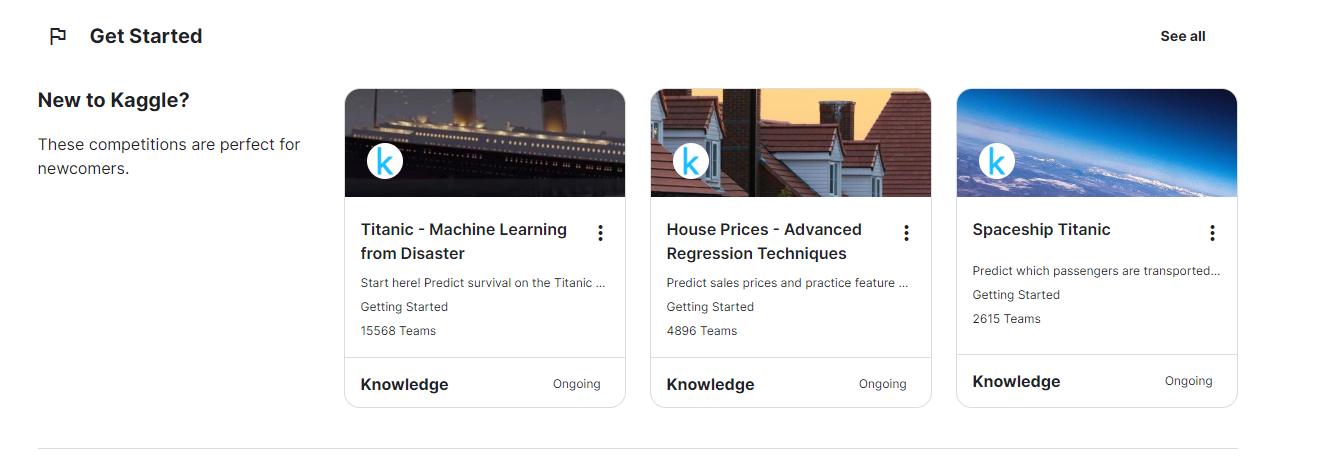


# Inteligentia artificial 101 
## ¿Qué es?
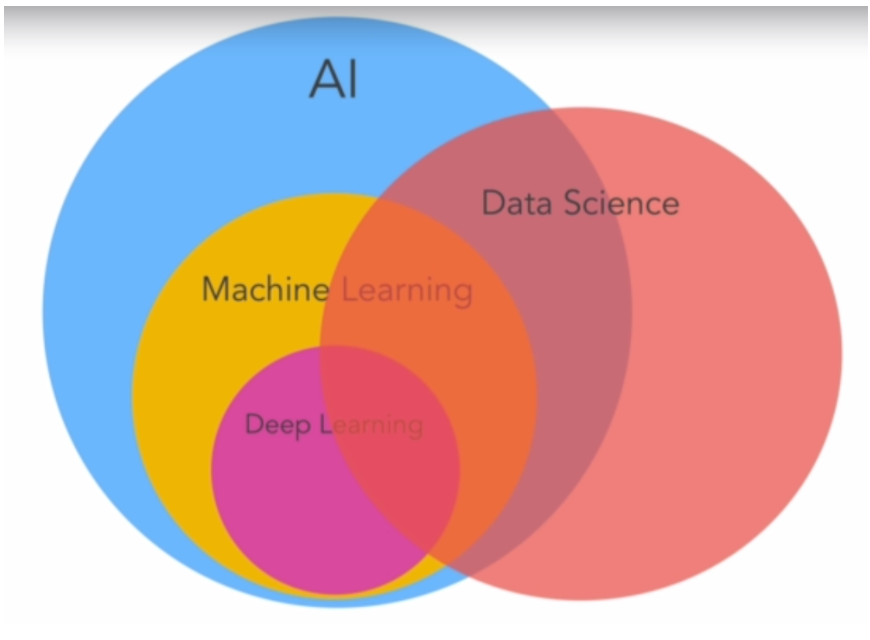!
## ¿Y a nosotros qué nos interesa?
En general vamos a charlar de **machine learning y deep learning.** 

# ¿Qué es un modelo?
Según un propio modelo, ChatGPT:
> En general, un modelo es una representación simplificada de un sistema o proceso complejo que se utiliza para comprender, predecir o simular su comportamiento. Puede ser una descripción matemática, conceptual o física que captura las relaciones importantes entre las variables o componentes del sistema. 

> En el contexto del machine learning, un modelo es un algoritmo o conjunto de algoritmos que aprenden patrones y relaciones a partir de datos para realizar tareas específicas, como clasificación, regresión, clustering, entre otras. Estos modelos son entrenados con datos de entrada y salida para que puedan generalizar y hacer predicciones o tomar decisiones sobre nuevos datos no vistos anteriormente. Los modelos pueden variar en complejidad y estructura, desde modelos simples como regresión lineal hasta modelos más complejos como redes neuronales profundas.

De todo eso nos interesa quedarnos con:
> "para que puedan generalizar"

# ¿Cómo armo mi modelo?
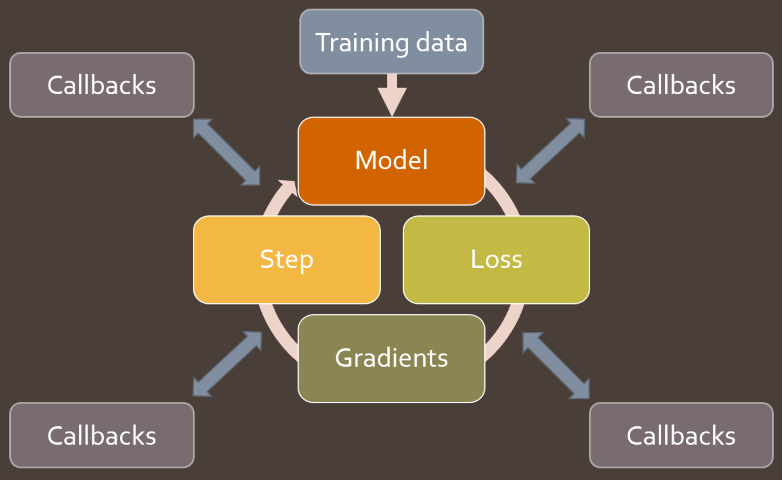

*fast.ai training loop*

Es un proceso iterativo donde de mide el rendimiento del modelo con una **función de error**, y luego se intenta **minimizar el error**. 

# Y todo esto, ¿cómo lo hacemos?
Con Python y diversas bibliotecas (Código que ya esta hecho e importamos para no preocuparnos de codearlo nosotros). Vamos a querer trabajar a un **alto nivel** de abstracción. Las librerias que vamos/podemos a usar son, entre otras:

* Fast.ai. Biblioteca de alto nivel escrita sobre pyTorch. Deep learning.
* pyTorch. Deep learning a bajo nivel.
* Matplotlib. Graficos.
* Numpy. Álgebra. 
* pandas. Manejo de los datos.


# Nuestro héroe: fast.ai
## [Documentación de fast.ai](https://docs.fast.ai/)

Vamos a importar la biblioteca y a mostrar un poco de qué se trata.

In [ ]:
from fastai.vision.all import *  

Para que la linea de abajo funcione, hay que activar el internet en este notebook. Para poder hacer eso, hay que verificar la cuenta de Kaggle con un número de celular.
Esta linea es sólo demostrativa.

In [ ]:
path = untar_data(URLs.PLANET_SAMPLE)

In [ ]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2)

In [ ]:
dls.show_batch()

# Otro ejemplo.

In [ ]:
path = untar_data(URLs.COCO_TINY)
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2)
dls.show_batch()

# Y hoy, ¿qué hacemos?
Vamos a estar mandando un modelo a la competición [Paddy Doctor: Paddy Disease Classification](https://www.kaggle.com/competitions/paddy-disease-classification). Es decir, vamos a usar los datos proporcionados por kaggle para entrenar el modelo y después subirlo para ver que tal funciona con datos nuevos.

El dataset contiene 10407 fotos etiquetadas en 10 clases; una para arroz sano y otras 9 para arroz con distintas enfermedades. También contamos el tipo de arroz que es y su edad en días, pero eso no lo vamos a utilizar. Nuestra tarea es clasificar imágenes en una de esas 10 categorías.

## Importando el dataset.
A la derecha, en Input, apretamos Add Input, Competition Datasets, y buscamos Paddy.
Ahora, copiamos la dirección de test_images y la guardamos en una variable.

### Prendemos el GPU P100

In [ ]:
from fastai.vision.all import *

In [ ]:
path = '/kaggle/input/paddy-disease-classification'
trn_path=  path + '/train_images' 
test_path = path + '/test_images'

Armamos los dataloaders.

In [ ]:
dls = ImageDataLoaders.from_folder(trn_path,
                                   valid_pct = 0.2,
                                   item_tfms = Resize(480,method='squish'),
                                   batch_tfms=aug_transforms(size= 128,
                                                            min_scale=0.75),
                                   bs=64)

E inspeccionamos los datos.

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, 'convnext_small.fb_in22k', metrics = error_rate).to_fp16()

In [ ]:
learn.fine_tune(5, 0.1)

# Ahora, vamos a mandar el modelo y ver cómo rinde.

In [ ]:
test_files = get_image_files(test_path).sorted()

In [ ]:
test_dl = dls.test_dl(test_files, bs=64) # apply transforms

In [ ]:
test_dl.show_batch()

In [ ]:
preds, _ = learn.get_preds(dl=test_dl) # get prediction
vocabulario = dls.vocab

In [ ]:
idx_preds = torch.argmax(preds, axis=1)

In [ ]:
idx_preds, vocabulario

In [ ]:
mapa_enfermedades = dict(enumerate(vocabulario))

In [ ]:
mapa_enfermedades

In [ ]:
preds = pd.Series(idx_preds).map(mapa_enfermedades)

In [ ]:
preds

In [ ]:
submission = pd.read_csv(path+'/sample_submission.csv')
submission

In [ ]:
submission['label'] = preds
submission

In [ ]:
submission.to_csv('/kaggle/working/submission.csv',index=False)

# Conclusión
Este submit está en el medio de la tabla de puntajes. Para un modelo hecho en 20 lineas y 15 minutos, ¿nos sirve?

# Fuentes 

[Curso de DeepLearning.ai en Coursera](https://www.coursera.org/specializations/deep-learning). Muy bueno para un fundamento teórico-matemáatico.

[Curso de fast.ai](https://course.fast.ai/). Excelente curso práctico. Basado en [este libro](https://github.com/fastai/fastbook/blob/master/01_intro.ipynb).

1. 